In [1]:
import zipfile, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
type_dict = {}
sec_type_dict = {}

with zipfile.ZipFile('./phyphox_data.zip', 'r') as zip_file:

    for name in zip_file.namelist():
        if name.endswith('.rar'):
            data_type = name.split('/')[0]
            cord = name[:-4].split('/')[1].split('_')[2:]
            cord = np.array([float(cord[0]), float(cord[1])])
            
            if data_type not in type_dict:
                type_dict[data_type] = pd.DataFrame()
                sec_type_dict[data_type] = {}

            zfiledata = io.BytesIO(zip_file.read(name))
            with zipfile.ZipFile(zfiledata, 'r') as sub_zipfile:
#                 print(sub_zipfile)
#                 sub_zipfile.printdir()
                
                with sub_zipfile.open('Magnetometer.csv', 'r') as csv_file:
                    df = pd.read_csv(csv_file, delimiter='\t')
                    
                    row = df.mean()
                    row['cord_x'] = cord[1]
                    row['cord_y'] = cord[0]

                    type_dict[data_type] = pd.concat([type_dict[data_type], row], axis=1)
                    sec_type_dict[data_type][(cord[1], cord[0])] = df.mean().to_numpy()

In [3]:
def convert(cord):
    sec_type_dict['FloatGrid'][cord] = sec_type_dict['FloatGrid'][cord][[0, 2, 1, 3]]

In [4]:
# convert((1.5, 1.5))
# convert((3.5, 1.5))
# convert((6.5, 1.5))
# convert((8.5, 1.5))

# convert((1.5, 9.5))
# convert((3.5, 9.5))
# convert((6.5, 9.5))
# convert((8.5, 9.5))

# convert((1.5, 4))
# convert((1.5, 7))
# convert((8.5, 4))
# convert((8.5, 7))

# convert((7.5, 8.5))

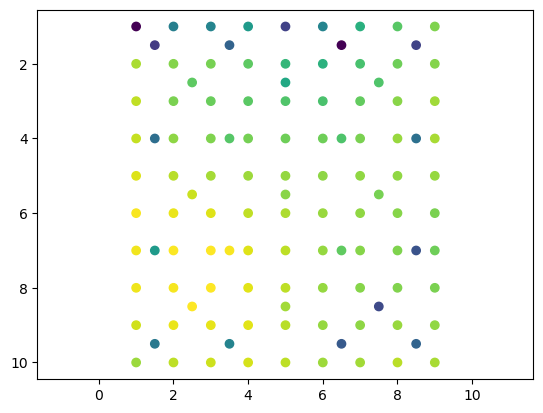

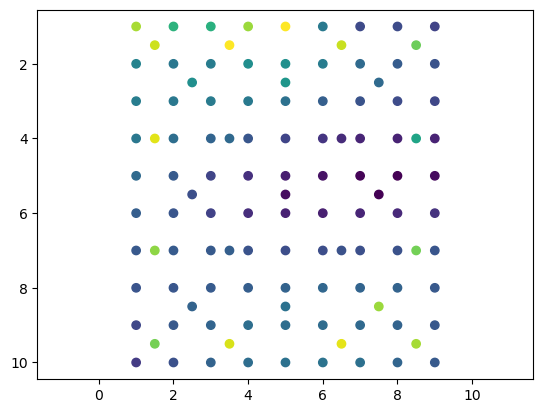

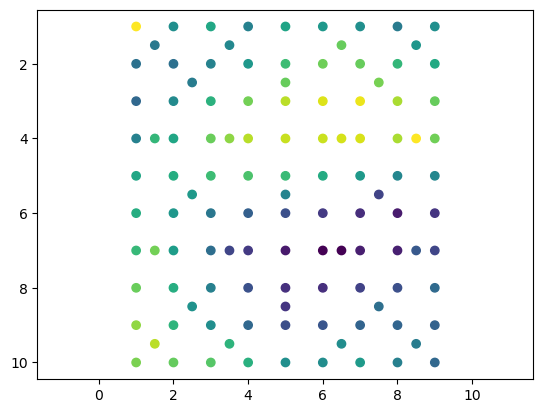

In [5]:
grid = type_dict['Grid'].T.to_numpy()
grid_x = grid[:, 4]
grid_y = grid[:, 5]
grid_magX = grid[:, 1]
grid_magY = grid[:, 2]
grid_magZ = grid[:, 3]

float_grid = np.array(list(sec_type_dict['FloatGrid'].values()))
float_grid_cord = np.array(list(sec_type_dict['FloatGrid'].keys()))
float_grid_x = float_grid_cord[:, 0]
float_grid_y = float_grid_cord[:, 1]
float_grid_magX = float_grid[:, 1]
float_grid_magY = float_grid[:, 2]
float_grid_magZ = float_grid[:, 3]

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magX)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magX)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magY)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magY)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magZ)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magZ)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

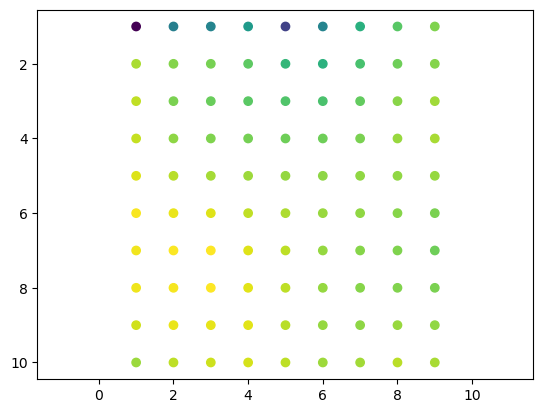

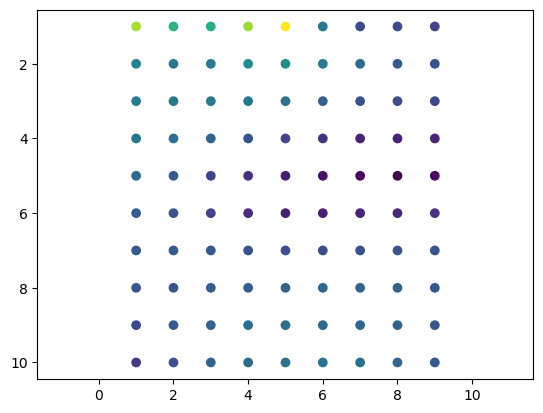

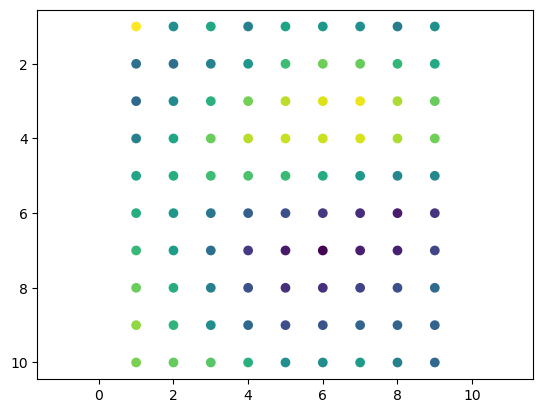

In [6]:
grid = type_dict['Grid'].T.to_numpy()
grid_x = grid[:, 4]
grid_y = grid[:, 5]
grid_magX = grid[:, 1]
grid_magY = grid[:, 2]
grid_magZ = grid[:, 3]

# float_grid = np.array(list(sec_type_dict['FloatGrid'].values()))
# float_grid_cord = np.array(list(sec_type_dict['FloatGrid'].keys()))
# float_grid_x = float_grid_cord[:, 0]
# float_grid_y = float_grid_cord[:, 1]
# float_grid_magX = float_grid[:, 1]
# float_grid_magY = float_grid[:, 2]
# float_grid_magZ = float_grid[:, 3]

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magX)
# plt.scatter(float_grid_x, float_grid_y, c=float_grid_magX)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magY)
# plt.scatter(float_grid_x, float_grid_y, c=float_grid_magY)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magZ)
# plt.scatter(float_grid_x, float_grid_y, c=float_grid_magZ)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

In [8]:
float_grid.shape

(25, 4)

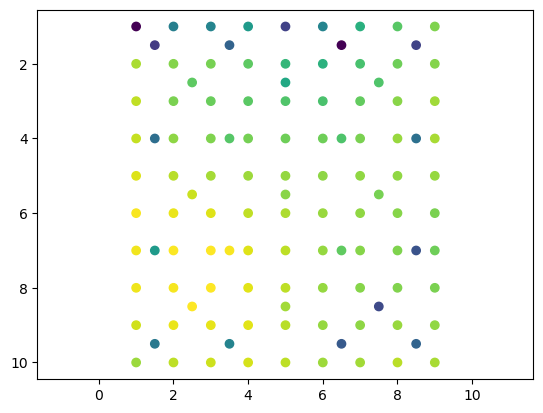

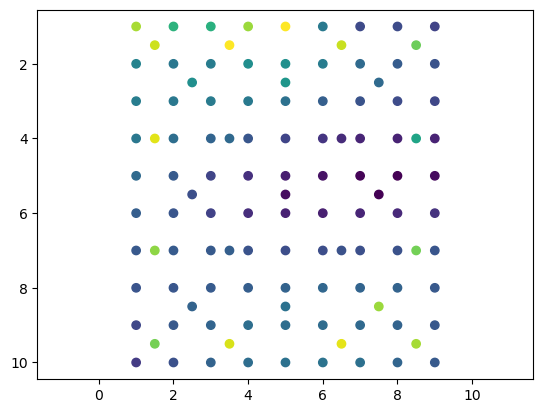

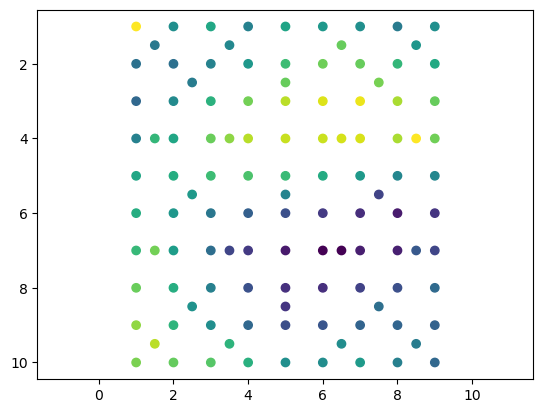

In [11]:
grid = type_dict['Grid'].T.to_numpy()
grid_x = grid[:, 4]
grid_y = grid[:, 5]
grid_magX = grid[:, 1]
grid_magY = grid[:, 2]
grid_magZ = grid[:, 3]

float_grid = np.array(list(sec_type_dict['FloatGrid'].values()))
float_grid_cord = np.array(list(sec_type_dict['FloatGrid'].keys()))
float_grid_x = float_grid_cord[:, 0]
float_grid_y = float_grid_cord[:, 1]
float_grid_magX = float_grid[:, 1]
float_grid_magY = float_grid[:, 2]
float_grid_magZ = float_grid[:, 3]

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magX)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magX)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magY)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magY)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magZ)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magZ)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()